In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as gph
import datetime
%matplotlib inline

# Question 1 :

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

In [205]:
#Step : 3
users=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep="|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [206]:
#Step : 4
users['age'].mean()

34.05196182396607

In [207]:
#Step : 5
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [208]:
#Step : 6
print(users.groupby('occupation').age.min())

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64


In [209]:
print(users.groupby('occupation').age.max())

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [210]:
#Step : 7
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [211]:
#Step : 8
gender1=users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
#gender1=users.groupby(['gender']).count()
occupation1= users.groupby(['occupation']).count()
result= gender1.div(occupation1, level = "occupation")
result.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# Question : 2

Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [212]:
#Step : 3
euro12=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=",")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [213]:
#Step : 4
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [214]:
#Step : 5
euro12.shape[0]

16

In [215]:
#Step : 6
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [216]:
#Step : 7
discipline=euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [217]:
#Step : 8
#euro12.sort_values(['Yellow Cards', 'Red Cards'], ascending = False)
discipline.sort_values(['Yellow Cards', 'Red Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
6,Greece,9,1
0,Croatia,9,0
9,Poland,7,1
1,Czech Republic,7,0
14,Sweden,7,0
11,Republic of Ireland,6,1
4,France,6,0


In [218]:
#Step : 9
round(euro12['Yellow Cards'].mean())

7

In [219]:
#Step : 10
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [220]:
#Step : 11
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [221]:
#Step : 12
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [222]:
#Step : 13
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [223]:
#Step : 14
euro12.loc[euro12.Team.isin(['Englad', 'Italy', 'Russia']), ['Shooting Accuracy']]

,Shooting Accuracy
7,43.0%
12,22.5%


# Question 3 :

Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [224]:
#Step : 2
siri1 = pd.Series(np.random.randint(1,4,size=100))
siri2 = pd.Series(np.random.randint(1,3,size=100))
siri3 = pd.Series(np.random.randint(10000,30000,size=100))

In [225]:
#Step: 3
dataframe = pd.concat([siri1,siri2,siri3], axis=1)
dataframe

,0,1,2
0,2,1,17380
1,2,1,15636
2,1,2,18111
3,2,1,17879
4,1,2,21350
...,...,...,...
95,3,2,13817
96,2,2,20656
97,1,2,17143
98,2,2,15980


In [226]:
#Step: 4
dataframe = dataframe.rename(columns={0: "bedrs", 1: "bathrs", 2: "price_sqr_meter"})
dataframe

,bedrs,bathrs,price_sqr_meter
0,2,1,17380
1,2,1,15636
2,1,2,18111
3,2,1,17879
4,1,2,21350
...,...,...,...
95,3,2,13817
96,2,2,20656
97,1,2,17143
98,2,2,15980


In [227]:
#Step: 5
bigcolumn = dataframe["bedrs"].astype(int)+dataframe["bathrs"].astype(int)+dataframe["price_sqr_meter"].astype(int)
dataframe["bigcolumn"] = bigcolumn
bigcolumn

0     17383
1     15639
2     18114
3     17882
4     21353
      ...  
95    13822
96    20660
97    17146
98    15984
99    21466
Length: 100, dtype: int64

In [228]:
#Step : 6
#Yes, It is going till 99.

In [229]:
#Step: 7
dataframe.reindex(index = range(0,300))

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,2.0,1.0,17380.0,17383.0
1,2.0,1.0,15636.0,15639.0
2,1.0,2.0,18111.0,18114.0
3,2.0,1.0,17879.0,17882.0
4,1.0,2.0,21350.0,21353.0
...,...,...,...,...
295,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN


# Question 4 :

Wind Statistics

The data have been modified to contain some missing values, identified by NaN.

Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or other looping construct.

The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [230]:
# Step : 3
data=pd.read_table('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep="\s+")
data.head()
cols=["Yr","Mo","Dy"]
data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data
data['date']=pd.to_datetime(data['date'])
data
data['date']=pd.to_datetime(data['date'],format='%Y%m%d')
data
data = data.drop(columns=["Yr","Mo","Dy"])
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [231]:
#Step : 4
data["date"] = np.where(pd.DatetimeIndex(data["date"]).year < 2000,data.date,data.date - pd.offsets.DateOffset(years=100))
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [232]:
#Step : 5
data1 = data.set_index("date")
data1.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='date', length=6574, freq=None)

In [233]:
#Step : 6
print(data.isnull().values.ravel().sum())

31


In [234]:
#Step : 7
a=data.count()
print(a.sum(),"are Non-Missing Values")

85431 are Non-Missing Values


In [235]:
#Step : 8
data2 = data.mean()
data2.mean()

<ipython-input-235-90c8b1c69f14>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2 = data.mean()


10.227982360836924

In [236]:
#Step : 9
def location(a):
    a = pd.Series(a)
    Min = a.min()
    Max = a.max()
    Mean = a.mean()
    Std = a.std()
    loc = [Min,Max,Mean,Std]
    ind = ["Min","Max","Mean","Std"]
    loc = pd.Series(loc,index=ind)
    return loc
loc_stats = data1.apply(location)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [237]:
#Step : 10
def day(a):
    a = pd.Series(a)
    Min = a.min()
    Max = a.max()
    Mean = a.mean()
    Std = a.std()
    loc = [Min,Max,Mean,Std]
    ind = ["Min","Max","Mean","Std"]
    loc = pd.Series(loc,index=ind)
    return loc
day_stats = data1.apply(day,axis=1)
day_stats

,Min,Max,Mean,Std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [238]:
#Step : 11
january = data1[data1.index.month == 1]
print ("Windspeeds in January")
print (january.mean())

Windspeeds in January
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [239]:
#Step : 12
print("Yearly", data1.resample('Y').mean())

Yearly                   RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9

In [240]:
#Step : 13
print ("Monthly:", data1.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

In [241]:
#Step : 14
print ("Weekly:", data1.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

In [242]:
#Step : 15
# Sorry, I tried but could not do this

# Question 5 :

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13. • Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

In [243]:
#Step : 3
chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")
#Step : 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [244]:
#Step : 5
print("Total number of observations are "+str(chipo.shape[0]))

Total number of observations are 4622


In [245]:
#Step : 6
print("Total number of columns are "+str(chipo.shape[1]))

Total number of columns are 5


In [246]:
#Step : 7
print("Name of the Columns : ")
for i in chipo.columns:
    print(i)

Name of the Columns : 
order_id
quantity
item_name
choice_description
item_price


In [247]:
#Step : 8
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [248]:
#Step : 9
print(str(chipo.groupby(['item_name'])['item_name'].count().nlargest(1).keys()[0]) + " is the Most Ordered Item")

Chicken Bowl is the Most Ordered Item


In [249]:
#Step : 10
print(str(chipo.groupby(['item_name'])['item_name'].count().nlargest(1)[0]) + " times Most Ordered Items was ordered.")

726 times Most Ordered Items was ordered.


In [250]:
#Step : 11
print(str(chipo.groupby(['choice_description'])['choice_description'].count().nlargest(1).keys()[0]) + " was the Most Ordered Item")

[Diet Coke] was the Most Ordered Item


In [251]:
#Step : 12
print(str(chipo.count().nlargest(1)[0]) + " total items were ordered.")

4622 total items were ordered.


In [252]:
#Step : 13
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo['item_price'].dtypes

dtype('float64')

In [253]:
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x))
chipo['item_price'].dtypes

dtype('float64')

In [254]:
#Step : 14
print("Revenue is $"+ str(round(sum(chipo['item_price']),2)))

Revenue is $34500.16


In [255]:
#Step : 15
print(str(chipo['order_id'].nunique()) + " were the total orders. ")

1834 were the total orders. 


In [256]:
#Step : 16
print("$" + str(round(sum(chipo['item_price'])/chipo['order_id'].nunique(),2)) + " is Average Revenue Amount per order. ")

$18.81 is Average Revenue Amount per order. 


In [257]:
#Step : 17
print(str(chipo["item_name"].nunique()) + " different items were sold. ")

50 different items were sold. 


# Question 6 :

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [258]:
usData= pd.read_csv("us-marriages-divorces-1867-2014.csv")

In [259]:
usData

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


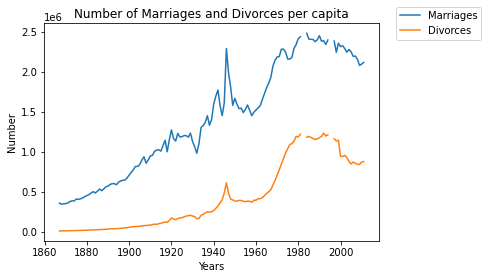

In [260]:
gph.title("Number of Marriages and Divorces per capita")
gph.xlabel("Years")
gph.ylabel("Number")
gph.plot(usData["Year"],usData["Marriages"], label="Marriages");
gph.plot(usData["Year"],usData["Divorces"], label="Divorces");
gph.legend(bbox_to_anchor=(1.05, 1), loc='center left', borderaxespad=0.)

# Question 7 :

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [261]:
usData2=usData[usData["Year"].isin([1900,1950,2000])]

In [262]:
usData2

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


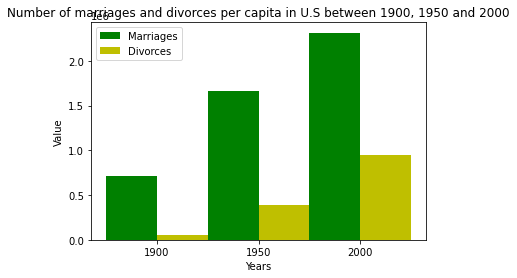

In [263]:
X = np.arange(len(usData2))
width = 0.50
mrg = gph.bar(X, usData2["Marriages"], width, color='g', label='Marriages')
div = gph.bar(X + width, usData2["Divorces"], width, color='y', label='Divorces')
gph.xlabel('Years')
gph.ylabel('Value')
gph.title('Number of marriages and divorces per capita in U.S between 1900, 1950 and 2000')
gph.xticks(X + (width/2) , usData2["Year"])
gph.legend()

# Question 8 :

 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
 the actors by their kill count and label each bar with the corresponding actor's name.
 Don't forget to label your axes!

In [264]:
kill=pd.read_csv("actor_kill_counts.csv")
kill

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


<BarContainer object of 10 artists>

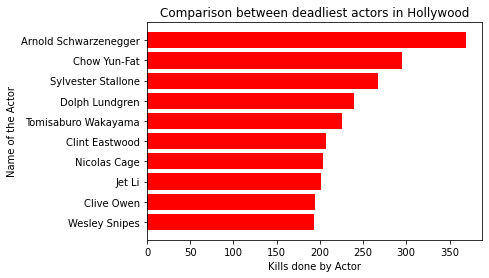

In [265]:
kill=kill.sort_values(by=['Count'])
gph.title("Comparison between deadliest actors in Hollywood")
gph.xlabel("Kills done by Actor")
gph.ylabel("Name of the Actor")
gph.barh(kill["Actor"], kill["Count"], color="r")

# Question 9 :

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [266]:
assass=pd.read_csv("roman-emperor-reigns.csv")
assass2= assass[assass["Cause_of_Death"]=="Assassinated"]
assass

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


Text(0.5, 1.0, 'Pie Chart of Emperors were assassinated')

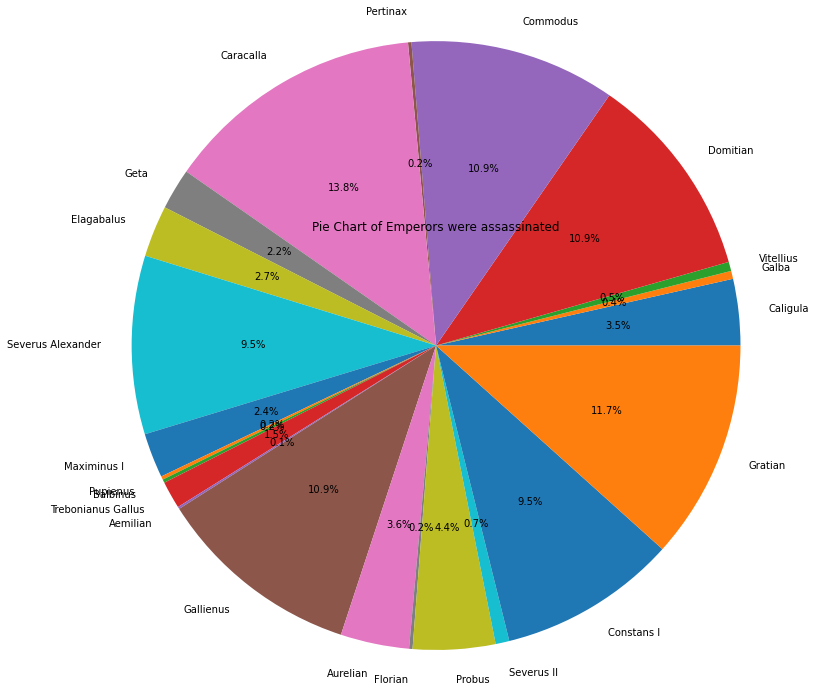

In [267]:
gph.pie(assass2["Length_of_Reign"], labels=assass2["Emperor"], radius=3.5, autopct='%.1f%%')
gph.title("Pie Chart of Emperors were assassinated")
#gph.legend(assass2["Emperor"], loc='best', bbox_to_anchor=(-0.1, 1.), title="Emperor:")


# Question 10 :

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

In [268]:
arcade=pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
arcade

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


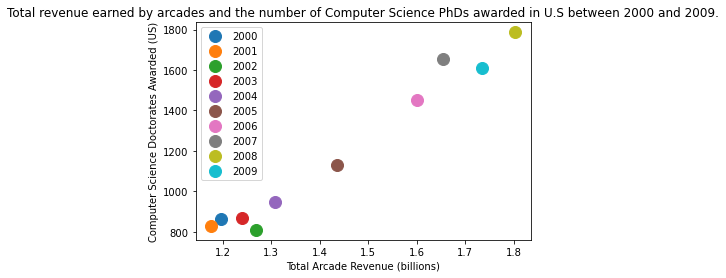

In [269]:
relation = arcade.groupby('Year')
for i, j in relation:
    gph.plot(j["Total Arcade Revenue (billions)"], j["Computer Science Doctorates Awarded (US)"], marker='o', linestyle='', markersize=12, label=i)

    
gph.xlabel("Total Arcade Revenue (billions)")
gph.ylabel("Computer Science Doctorates Awarded (US)")
gph.title("Total revenue earned by arcades and the number of Computer Science PhDs awarded in U.S between 2000 and 2009.")
gph.legend()